In [8]:
# pip install --upgrade tensorflow keras

In [14]:
import tensorflow as tf

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Load the Data

In [6]:
cifar10 = tf.keras.datasets.cifar10

In [7]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

X_train,X_test = X_train/255.0, X_test/ 255.0
y_train,y_test = y_train.flatten(), y_test.flatten() 

print("x train.shape: ", X_train.shape)
print("y train.shape: ",y_train.shape)

170498071/170498071 [==============================] - 1665s 10us/step
x train.shape:  (50000, 32, 32, 3)
y train.shape:  (50000,)


In [23]:
# Number of classes

K= len(set(y_train))
print("Number of classes: ",K)

Number of classes:  10


# Build the model using functional API

In [24]:
# i is input 
# x is output

i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides= 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation= 'relu')(x)
x=  Dropout(0.2)(x)
x = Dense(K, activation= 'softmax')(x)


model = Model(i,x)

# Compile and Fit

In [25]:
model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

r= model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5937 - accuracy: 0.4144 - val_loss: 1.2760 - val_accuracy: 0.5354
Epoch 2/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3012 - accuracy: 0.5304 - val_loss: 1.1727 - val_accuracy: 0.5693
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1678 - accuracy: 0.5832 - val_loss: 1.0899 - val_accuracy: 0.6010
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0756 - accuracy: 0.6160 - val_loss: 0.9963 - val_accuracy: 0.6462
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9947 - accuracy: 0.6432 - val_loss: 0.9787 - val_accuracy: 0.6561
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9418 - accuracy: 0.6661 - val_loss: 0.9088 - val_accuracy: 0.6831
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8872 - accuracy: 0.6839 - val_loss: 0.8885 -

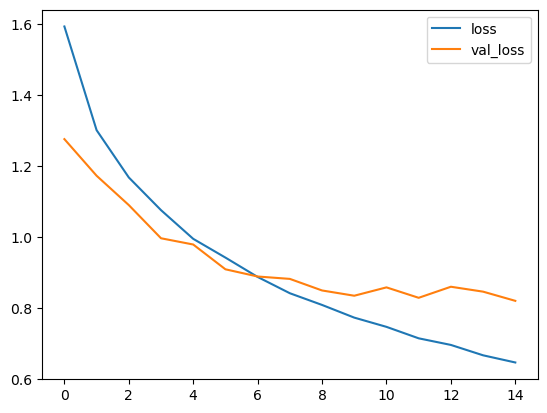

In [26]:
# Plot loss per iteration

plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

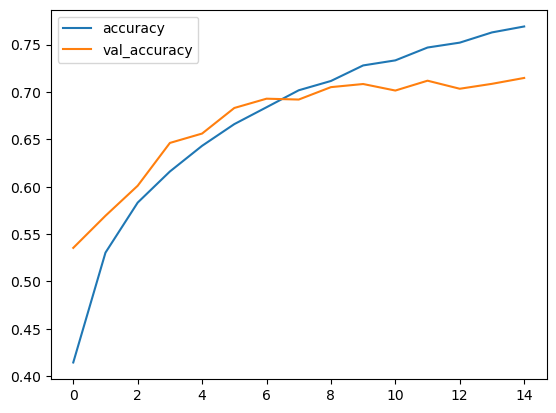

In [28]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# plot the confusion matrix

In [45]:
# from sklearn.metrics import confusion_matrix
# import itertools

# def plot_confusion_metrix(cm, classes,
#                          normalizer=False,
#                          title= 'confusion matrix',
#                          cmap= plt.cm.Blues):
    
#  if normalize:
#     cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print("Normalize confusion Matrix")
#  else:
#         print("confusion matrix, without normalization")
#  print(cm)
    
#  plt.imshow(cm,interpolation='nearest', cmap=cmap)
#  plt.title(title)
#  plt.colorbar()
#  tick_marks= np.arange(len(classes))
#  plt.xticks(tick_marks, classes,rotation=45)
#  plt.yticks(tick_marks, classes)
    
#  fmt= '.2f' if normalize else 'd'
#  thresh= cm.max() / 2.
#  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text (j,i, format(cm[i,j], fmt),
#                  horizontalalignment='center',
#                  color= 'white' if cm[i,j] > thresh else 'black')
        
#  plt.tight_layout()    
#  plt.ylabel('True label')
#  plt.xlabel('Predicted label')
#  plt.show()
    
# p_test=model.predict(X_test).argmax(axis=1)    
# cm= confusion_matrix(y_test, p_test)
# plot_confusion_metrix(cm, list(range(10)))

In [43]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_metrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage
# Assuming cm and classes are defined
# cm = confusion_matrix(y_test, p_test)
# plot_confusion_metrix(cm, list(range(10)), normalize=True)


313/313 [==============================] - 1s 3ms/step


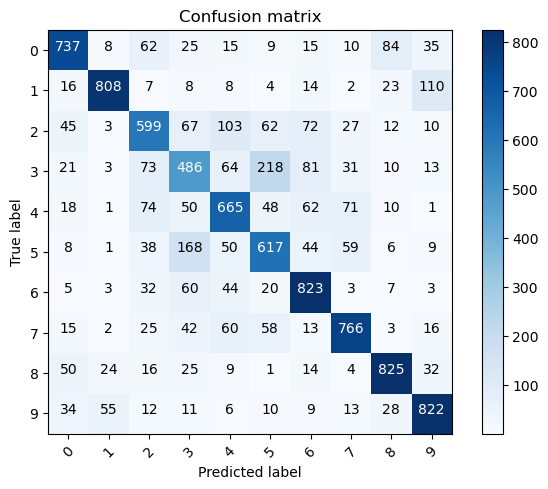

In [44]:
p_test=model.predict(X_test).argmax(axis=1)    
cm= confusion_matrix(y_test, p_test)
plot_confusion_metrix(cm, list(range(10)))

In [46]:
# Label mapping

labels= '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

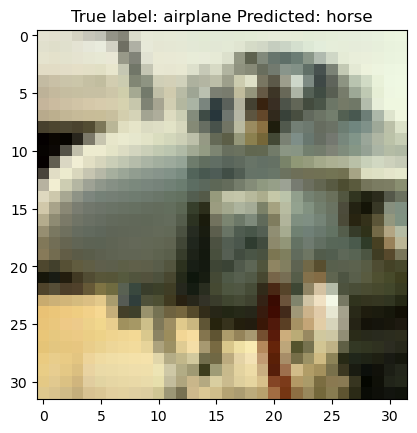

In [51]:
# show some missclassified examples

missclassified_idx= np.where(p_test != y_test)[0]
i= np.random.choice(missclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));